## 1. 데이터, 모듈 불러오기 및 KNN 피팅 방법

- 함수 불러오기

In [1]:
from sklearn import neighbors, datasets

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [4]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

- 모델 구축

In [5]:
clf = neighbors.KNeighborsClassifier(5)
clf.fit(X,y)

KNeighborsClassifier()

In [7]:
y_pred = clf.predict(X)

In [8]:
from sklearn.metrics import confusion_matrix

In [9]:
confusion_matrix(y, y_pred)

array([[49,  1,  0],
       [ 0, 38, 12],
       [ 0, 12, 38]], dtype=int64)

## 2. Cross-validation을 활용한 최적의 k찾기

- 함수 불러오기

In [13]:
from sklearn.model_selection import cross_val_score

- CV 진행

In [14]:
k_range = range(1,100)
k_scores = []

for k in k_range:
    knn = neighbors.KNeighborsClassifier(k)
    scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())

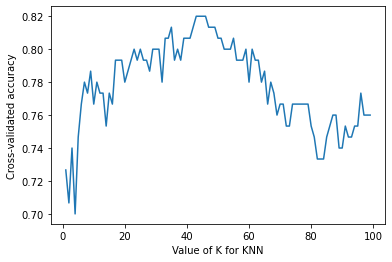

In [15]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.show()

## 2.Weight를 준 kNN

In [17]:
n_neighbors = 40

h = 2 # step size in the mesh